In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
java_data = pd.read_csv('./java_data1.csv')
python_data = pd.read_csv('./python_data1.csv')
mean_salary = (java_data['min_salary'] + java_data['max_salary']) / 2
offset = mean_salary - java_data['min_salary']
java_data = java_data.drop(['min_salary', 'max_salary'], axis = 1)
java_data['mean_salary'] = mean_salary
java_data['offset'] = offset

mean_salary = (python_data['min_salary'] + python_data['max_salary']) / 2
offset = mean_salary - python_data['min_salary']
python_data = python_data.drop(['min_salary', 'max_salary'], axis = 1)
python_data['mean_salary'] = mean_salary
python_data['offset'] = offset

#java
X_java = python_data.drop(['mean_salary', 'offset'], axis = 1)
y_java1 = python_data['mean_salary']
y_java2 = python_data['offset']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_java, y_java1, test_size = 0.2, random_state = 6)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_java, y_java2, test_size = 0.2, random_state = 6)

In [24]:
python_data.head()

,financeStage,education,min_salary,max_salary,companySize,workYear,district
0,6.0,2.0,20,40,1250.0,0.0,0
1,4.0,2.0,15,30,325.0,2.0,1
2,0.0,1.0,12,16,100.0,2.0,0
3,4.0,2.0,20,30,100.0,2.0,0
4,3.0,2.0,15,30,32.5,0.0,1


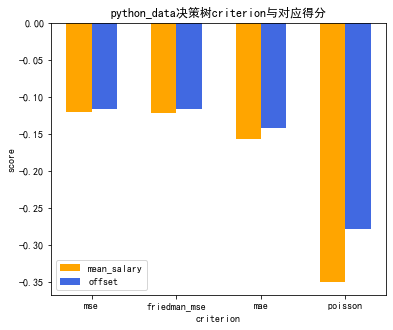

In [7]:
criterions = ['mse', 'friedman_mse', 'mae', 'poisson']
scores1 = []
scores2 = []
DT = DecisionTreeRegressor(criterion = 'mse', random_state = 16)
score1 = cross_val_score(DT, X_train1, y_train1, cv = 10).mean()
score2 = cross_val_score(DT, X_train2, y_train2, cv = 10).mean()
scores1.append(score1)
scores2.append(score2)
DT = DecisionTreeRegressor(criterion = 'friedman_mse', random_state = 16)
score1 = cross_val_score(DT, X_train1, y_train1, cv = 10).mean()
score2 = cross_val_score(DT, X_train2, y_train2, cv = 10).mean()
scores1.append(score1)
scores2.append(score2)
DT = DecisionTreeRegressor(criterion = 'mae', random_state = 16)
score1 = cross_val_score(DT, X_train1, y_train1, cv = 10).mean()
score2 = cross_val_score(DT, X_train2, y_train2, cv = 10).mean()
scores1.append(score1)
scores2.append(score2)
DT = DecisionTreeRegressor(criterion = 'poisson', random_state = 16)
score1 = cross_val_score(DT, X_train1, y_train1, cv = 10).mean()
score2 = cross_val_score(DT, X_train2, y_train2, cv = 10).mean()
scores1.append(score1)
scores2.append(score2)

plt.figure(figsize = (6, 5))
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
x_labels = criterions
# 生成横坐标范围
x = np.arange(4)
# 生成多柱图
plt.bar(x + 0.00, scores1, color='orange', width=0.3, label="mean_salary")
plt.bar(x + 0.30, scores2, color='royalblue', width=0.3, label="offset")
# 横坐标绑定
plt.xticks(x + 0.15, x_labels)
plt.xlabel("criterion")
plt.ylabel("score")
plt.title('python_data决策树criterion与对应得分')
# 生成图片
plt.legend()
plt.savefig("python_data决策树criterion与对应得分.png")

最优参数以及最高得分为: [2.         0.20948548]
最优参数以及最高得分为: [3.         0.11292382]


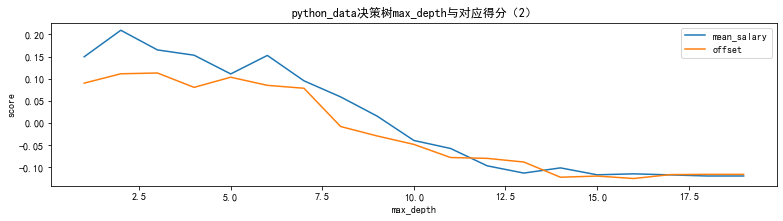

<Figure size 432x288 with 0 Axes>

In [11]:
ScoreAll1 = []
ScoreAll2 = []
for i in range(1,20,1):
    DT = DecisionTreeRegressor(criterion = 'mse', max_depth = i, random_state = 16)
    score1 = cross_val_score(DT,X_train1,y_train1,cv=10).mean()
    score2 = cross_val_score(DT,X_train2,y_train2,cv=10).mean()
    ScoreAll1.append([i,score1])
    ScoreAll2.append([i,score2])
ScoreAll1 = np.array(ScoreAll1)
ScoreAll2 = np.array(ScoreAll2)
max_score1 = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0]
max_score2 = np.where(ScoreAll2==np.max(ScoreAll2[:,1]))[0][0]
print("最优参数以及最高得分为:",ScoreAll1[max_score1])  
print("最优参数以及最高得分为:",ScoreAll2[max_score2])  
plt.figure(figsize=[13,3])
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1], label="mean_salary")
plt.plot(ScoreAll2[:,0],ScoreAll2[:,1], label="offset")
plt.legend()
plt.title('python_data决策树max_depth与对应得分（2）')
plt.show()
plt.savefig("java_data决策树max_depth与对应得分（1）.png")

最优参数以及最高得分为: [2.         0.20948548]
最优参数以及最高得分为: [2.         0.11292382]


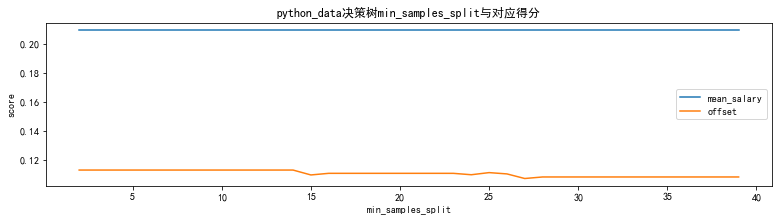

<Figure size 432x288 with 0 Axes>

In [12]:
ScoreAll1 = []
ScoreAll2 = []
for i in range(2,40,1):
    DT1 = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, min_samples_split = i, random_state = 16)
    DT2 = DecisionTreeRegressor(criterion = 'mse', max_depth = 3, min_samples_split = i, random_state = 16)
    score1 = cross_val_score(DT1,X_train1,y_train1,cv=10).mean()
    score2 = cross_val_score(DT2,X_train2,y_train2,cv=10).mean()
    ScoreAll1.append([i,score1])
    ScoreAll2.append([i,score2])
ScoreAll1 = np.array(ScoreAll1)
ScoreAll2 = np.array(ScoreAll2)
max_score1 = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0]
max_score2 = np.where(ScoreAll2==np.max(ScoreAll2[:,1]))[0][0]
print("最优参数以及最高得分为:",ScoreAll1[max_score1])  
print("最优参数以及最高得分为:",ScoreAll2[max_score2])  
plt.figure(figsize=[13,3])
plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1], label="mean_salary")
plt.plot(ScoreAll2[:,0],ScoreAll2[:,1], label="offset")
plt.legend()
plt.title('python_data决策树min_samples_split与对应得分')
plt.show()
plt.savefig("java_data决策树min_samples_split与对应得分.png")

最优参数以及最高得分为: [23.          0.21671553]
最优参数以及最高得分为: [3.         0.11764539]


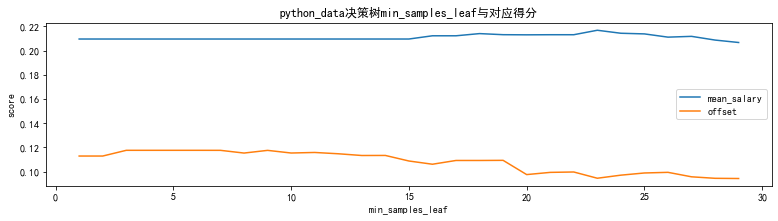

<Figure size 432x288 with 0 Axes>

In [13]:
ScoreAll1 = []
ScoreAll2 = []
for i in range(1,30,1):
    DT1 = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, min_samples_split = 2, min_samples_leaf = i, random_state = 16)
    DT2 = DecisionTreeRegressor(criterion = 'mse', max_depth = 3, min_samples_split = 2, min_samples_leaf = i, random_state = 16)
    score1 = cross_val_score(DT1,X_train1,y_train1,cv=10).mean()
    score2 = cross_val_score(DT2,X_train2,y_train2,cv=10).mean()
    ScoreAll1.append([i,score1])
    ScoreAll2.append([i,score2])
ScoreAll1 = np.array(ScoreAll1)
ScoreAll2 = np.array(ScoreAll2)
max_score1 = np.where(ScoreAll1==np.max(ScoreAll1[:,1]))[0][0]
max_score2 = np.where(ScoreAll2==np.max(ScoreAll2[:,1]))[0][0]
print("最优参数以及最高得分为:",ScoreAll1[max_score1])  
print("最优参数以及最高得分为:",ScoreAll2[max_score2])  
plt.figure(figsize=[13,3])
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(ScoreAll1[:,0],ScoreAll1[:,1], label="mean_salary")
plt.plot(ScoreAll2[:,0],ScoreAll2[:,1], label="offset")
plt.legend()
plt.title('python_data决策树min_samples_leaf与对应得分')
plt.show()
plt.savefig("java_data决策树min_samples_leaf与对应得分.png")

In [14]:
parameters = {'criterion':['mse'],
              'max_depth':range(1, 20),
              'min_samples_split':range(20, 40),
              'min_samples_leaf':range(1, 20),
              'random_state':[16]}
DT = DecisionTreeRegressor()
gsearch = GridSearchCV(DT, parameters, cv = 10)
gsearch.fit(X_train1, y_train1)
print('最优模型各参数的取值为：',gsearch.best_params_)
print('此时模型的得分为：',gsearch.best_score_)

最优模型各参数的取值为： {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 18, 'min_samples_split': 20, 'random_state': 16}
此时模型的得分为： 0.21395708265942193


In [15]:
parameters = {'criterion':['mse'],
              'max_depth':range(1, 20),
              'min_samples_split':range(20, 40),
              'min_samples_leaf':range(1, 20),
              'random_state':[16]}
DT = DecisionTreeRegressor()
gsearch = GridSearchCV(DT, parameters, cv = 10)
gsearch.fit(X_train2, y_train2)
print('最优模型各参数的取值为：',gsearch.best_params_)
print('此时模型的得分为：',gsearch.best_score_)

最优模型各参数的取值为： {'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 21, 'random_state': 16}
此时模型的得分为： 0.12771791579231256


In [26]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
dt = DecisionTreeRegressor(criterion= 'mse', max_depth = 2, min_samples_leaf = 23, min_samples_split = 2, random_state = 16)
dt.fit(X_train1, y_train1)
y_pre1 = dt.predict(X_test1)
print('python_data数据集预测mean_salary：')
print('预测r2为：',r2_score(y_test1,y_pre1))
print('预测adjusted_r2为：',1-((1-r2_score(y_test1,y_pre1))*125/120))
dt = DecisionTreeRegressor(criterion= 'mse', max_depth = 5, min_samples_leaf = 3, min_samples_split = 21, random_state = 16)
dt.fit(X_train2, y_train2)
y_pre2 = dt.predict(X_test2)
print('python_data数据集预测offset：')
print('预测r2为：',r2_score(y_test2,y_pre2))
print('预测adjusted_r2为：',1-((1-r2_score(y_test2,y_pre2))*125/120))

python_data数据集预测mean_salary：
预测r2为： 0.2579614789004744
预测adjusted_r2为： 0.2270432071879942
python_data数据集预测offset：
预测r2为： 0.20702686622594202
预测adjusted_r2为： 0.17398631898535633


In [20]:
dt1 = DecisionTreeRegressor(criterion= 'mse', max_depth = 2, min_samples_leaf = 23, min_samples_split = 2, random_state = 16)
dt1.fit(X_train1, y_train1)
apply = np.array([7, #上市公司融资阶段对应financeStage为7
                  2, #本科学历对应education为2
                  (150+500)/2, #公司规模companySize为范围极值的平均值
                  (1+3)/2, #工作经历workYear为范围极值的平均值
                  0 #海淀区对应district为0
])
dt2 = DecisionTreeRegressor(criterion= 'mse', max_depth = 5, min_samples_leaf = 3, min_samples_split = 21, random_state = 16)
dt2.fit(X_train2, y_train2)
pre1 = dt1.predict(apply.reshape(1, -1))
pre2 = dt2.predict(apply.reshape(1, -1))
print('该岗位的预测薪资为', (pre1[0] - pre2[0]) * 1000, '元到', (pre1[0] + pre2[0]) * 1000, '元')

该岗位的预测薪资为 15125.0 元到 25500.0 元
